### calculate the velocity as a function of acceleration and travel time

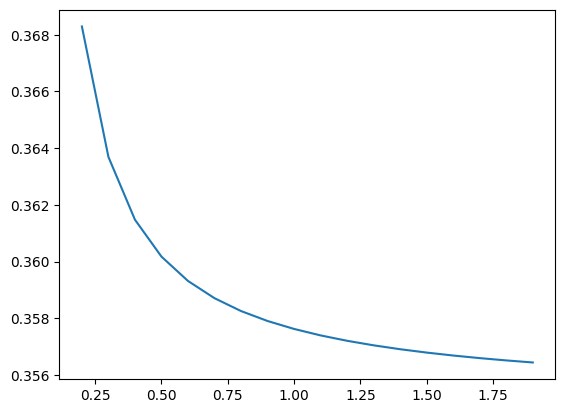

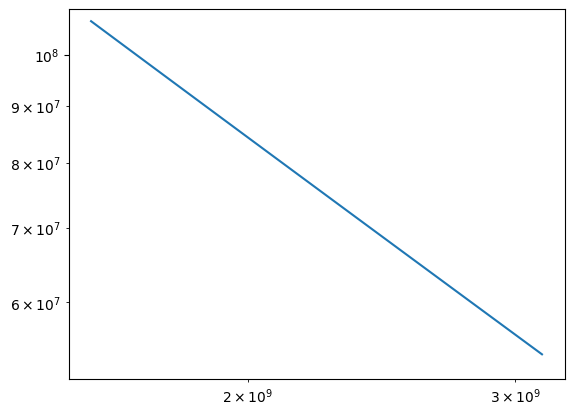

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
light_year = 4e16
seconds_year = 3600 * 24 * 365.25
c = 2.998e8
g=9.8
t_f = 50 * seconds_year  # years
x = 4.2 * light_year # light years

acc = np.arange(0.2, 2, 0.1)*g
plt.plot(acc/9.8, V_0(acc, t_f, x)/c )
plt.ylim(None,)
plt.show()

travel_time = np.arange(50, 100, 1) * seconds_year
plt.plot(travel_time, V_0(g, travel_time, x) )
plt.ylim(None,)
plt.yscale("log")
plt.xscale("log")
plt.show()

### acceleration 

In [4]:
def t_1(acc,t_f, x):
    return (acc * t_f - np.sqrt((acc * t_f)**2 - 4 * acc * x)) / (2 * acc)


(37.14459349769097, 681.2893519237954)

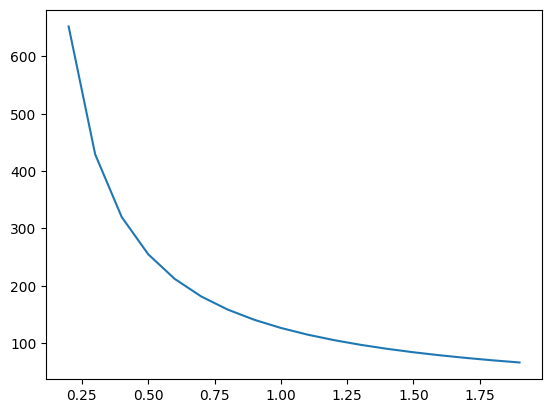

In [5]:
plt.plot(acc/9.8, t_1(acc, t_f, x) / (3600 * 24) )
plt.ylim(None,)

In [6]:
a = g
v0 = V_0(a,t_f, x)
T= t_f - 4*t_1(a,t_f, x)

tau_1 = (c / a) * np.arcsinh(v0 / c)
gamma = 1 / np.sqrt(1 - (v0**2 / c**2))
tau_2 = T / gamma

# Total proper time
tau_total = 2 * tau_1 + tau_2

In [7]:
tau_total/seconds_year


46.077666581279495

In [8]:
t_f/seconds_year

50.0

In [9]:
t_1(a, t_f, x) / seconds_year

0.3466785463388413

In [10]:
v_exhast =3000
def mass_ratio(delta_v):
    print(delta_v/v_exhast)
    return np.exp(delta_v/v_exhast)

In [11]:
travel_time = np.arange(50, 1000000, 1) * seconds_year
print(4*V_0(a,travel_time,x))
mass_ratio(4*V_0(a,travel_time,x))

[4.28861441e+08 4.20337662e+08 4.12148263e+08 ... 2.12944813e+04
 2.12944813e+04 2.12944047e+04]
[1.42953814e+05 1.40112554e+05 1.37382754e+05 ... 7.09816042e+00
 7.09816042e+00 7.09813490e+00]


C:\Users\morga\AppData\Local\Temp\ipykernel_10360\462608785.py:4: RuntimeWarning: overflow encountered in exp
  return np.exp(delta_v/v_exhast)


array([          inf,           inf,           inf, ..., 1209.73960949,
       1209.73960949, 1209.70873632])

### travel time in terms of mass ratio

In [44]:
v_e = 4400 # check this number
light_year = c * seconds_year
x = (4.2 * light_year)
acc = g

def V_0(acc, t_f, x):   
    return  (t_f - np.sqrt(t_f ** 2 - 4 * x / acc)) / (2 / acc)

def travel_time_to_mass_ratio(init_to_empty_ratio):
    A= 4 * x / a
    B= 1 / a * (v_e* np.log(init_to_empty_ratio))
    return (A + B**2) / (2 * B)

2485.666364493983


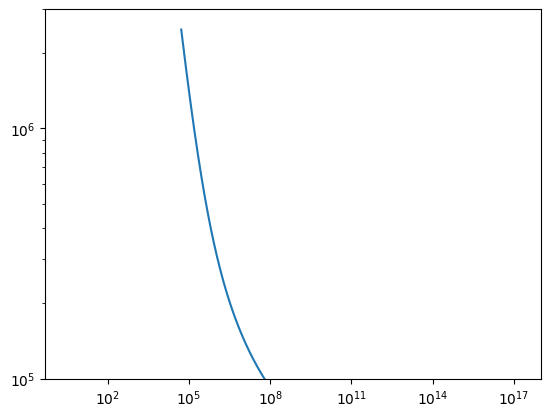

54197.63504440597 23232.748051982842


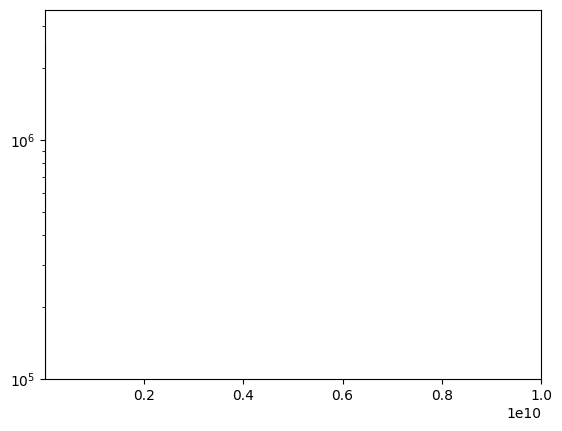

In [45]:
m0_mf = np.logspace(0.1, 100, int(1e6))


plt.plot(m0_mf * 2e5 - 2e5, travel_time_to_mass_ratio(m0_mf)/seconds_year)
print(min(travel_time_to_mass_ratio(m0_mf))/seconds_year)
plt.xscale("log")

plt.yscale("log")
plt.ylim(1e5,3e6)
plt.xlim(None,1e18)

plt.show()
plt.plot(m0_mf, travel_time_to_mass_ratio(m0_mf)/seconds_year)
plt.yscale("log")
plt.xlim(1,1e10)
plt.ylim(1e5,)

print(x/travel_time_to_mass_ratio(1e16/2e5), travel_time_to_mass_ratio(1e16/2e5)/seconds_year)

2485.666364493983


(1000.0, 1e+20)

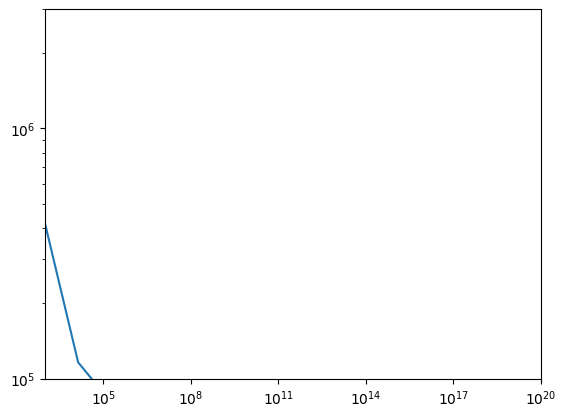

In [46]:
m0_mf = np.logspace(0.1, 100)


plt.plot(m0_mf * 100 - 100, travel_time_to_mass_ratio(m0_mf)/seconds_year)
print(min(travel_time_to_mass_ratio(m0_mf))/seconds_year)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e5,3e6)
plt.xlim(1e3,1e20)

In [19]:
1e18*1000*2.5/100

2.5e+19

### solar sail maths

In [ ]:


def mass_ratio_sail(t):
    return 3 /( 8*np.pi) * ((1+R) * L_star * t ** 2)/(c * rho * r_0 ** 3) * (1/1000**3)

def t_acc(mass_ratio):
    return np.sqrt(mass_ratio**-1 / (3 /( 8*np.pi) * ((1+R) * L_star)/(c * rho * r_0 ** 3 * 1000**3)))

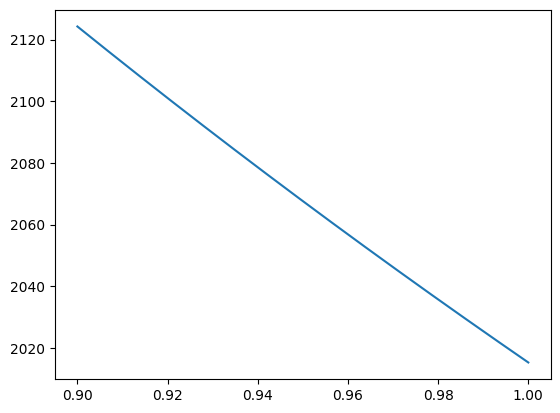

In [62]:
mass_ratios = np.arange(0.9, 0.999999,0.000001)
plt.plot(mass_ratios, t_acc(mass_ratios)/seconds_year)

### actual calculation

In [48]:
def time_travelled(m_mir_m_tot):
    B = (m_mir_m_tot * (1 + R) * L_star) / (4 *np.pi * c * rho)
    return 2 * x * np.sqrt(r_0 / (2 * B))

(100000.0, 1784024.589229954)

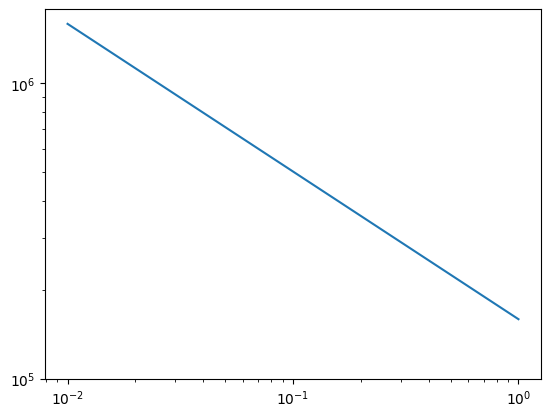

In [49]:
m_mir_m_tot = np.logspace(-2,0)

plt.plot(m_mir_m_tot, time_travelled(m_mir_m_tot) / seconds_year)
plt.xscale("log")
plt.yscale("log")
#plt.hlines(5e9, 10e-6, 1e0,"k", "dashed")
plt.ylim(1e5)

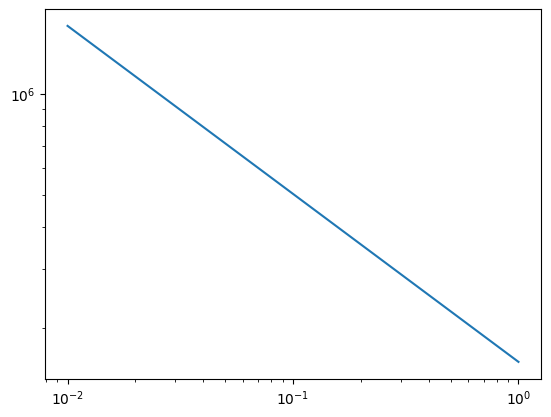

In [51]:
m_mir_m_tot = np.logspace(-2,0)

plt.plot(m_mir_m_tot, time_travelled(m_mir_m_tot) / seconds_year)
plt.xscale("log")
plt.yscale("log")
#plt.hlines(5e9, 10e-6, 1e0,"k", "dashed")
#plt.hlines(1e6, 1e3, 5e5)
#

In [137]:
np.sqrt(1e5/rho)

16903.08509457033